# 1. 加载必要的模块

In [1]:
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np
import seaborn as sns
from scipy.fftpack import fft,ifft

# 2. 确保csv数据格式如图所示

![csv文件格式](https://raw.githubusercontent.com/techyoung-edu/sleepmonitor/master/acc_csv_format.png)

# 3. 加载csv数据

In [2]:
dataset = pd.read_csv("AccData_Repository.csv",names = ["time","acc"])
dataset.head()

,time,acc
0,07:40:54.493,0.953239
1,07:40:54.527,0.941747
2,07:40:54.564,0.945992
3,07:40:54.564,0.944917
4,07:40:54.598,0.954352


# 4. 处理acc数据
+ 使用numpy array来对acc_list进行处理
+ 把加速度减去1.0,这是传感器静态时默认的加速度。
+ 把加速度乘1000,从而使的加速度变成以mg为单位。
+ 求出期望和标准差

In [6]:
acc_list = np.array(dataset["acc"])
acc_time = np.array(dataset["time"])
acc_list = (acc_list - 1.0)*1000
acc_mean = np.mean(acc_list)
acc_std  = np.std(acc_list)
acc_mean_str = "{:.2f}".format(acc_mean)
acc_std_str = "{:.2f}".format(acc_std)
print("the acc dist mean:%.2fmg and std:%.2fmg" %(acc_mean,acc_std))

the acc dist mean:-52.95mg and std:5.89mg


# 5. 绘制综合加速度FFT图
+ 选取前1024/2048/4096/8192个数据,方便做FFT.


In [18]:
CONST_FFT_SIZE = 1024
CONST_SMP_SIZE = 32
freqs = np.linspace(0, CONST_SMP_SIZE/2, int(CONST_FFT_SIZE/2)+1)
freqs[:10]
freqs[-10:]

array([15.71875, 15.75   , 15.78125, 15.8125 , 15.84375, 15.875  ,
       15.90625, 15.9375 , 15.96875, 16.     ])

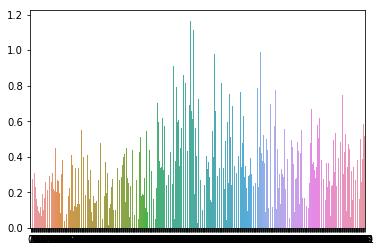

In [10]:
acc_list = acc_list[:CONST_FFT_SIZE]
acc_time = acc_time[:CONST_FFT_SIZE]
acc_fft = fft(acc_list)                     #快速傅里叶变换
fft_size = (acc_list.size/2)
fft_abs = abs(acc_fft)                      # 取模
fft_norm= fft_abs/fft_size                  #归一化处理
fft_half= fft_norm[range(int(fft_size))]    #由于对称性，只取一半区间            
fqx = np.arange(len(acc_list))              # 频率
fqx_half = fqx[range(int(fft_size))]        #频率取一半区间
fft_half
fqx_half
fft_half[0]=0
sns.barplot(x=fqx_half,y=fft_half)


# 用matplotlib绘制频谱

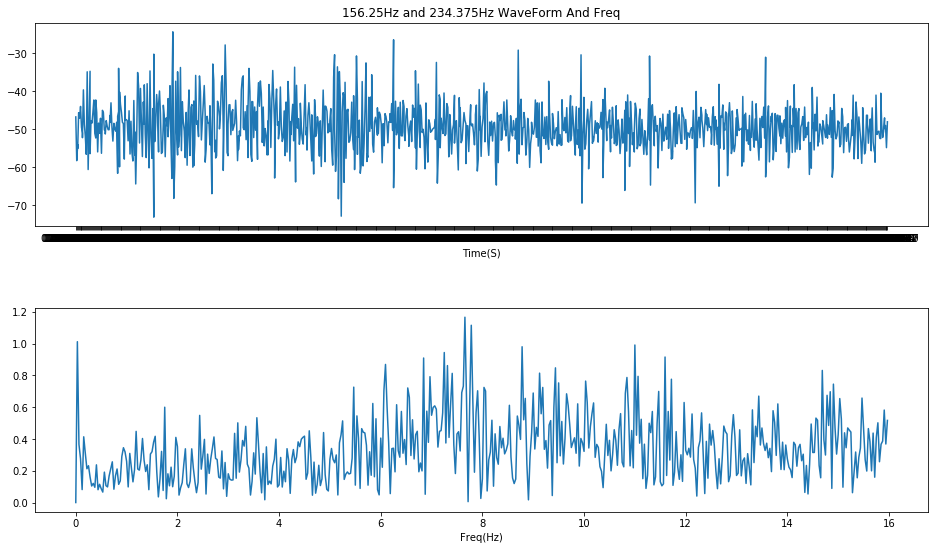

In [20]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(acc_time, acc_list)
plt.xlabel(u"Time(S)")
plt.title(u"156.25Hz and 234.375Hz WaveForm And Freq")
plt.subplot(212)
plt.plot(freqs[:512], fft_half)
plt.xlabel(u"Freq(Hz)")
plt.subplots_adjust(hspace=0.4)
plt.show()